<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Reconhecimento de Entidades Nomeadas** 

---



Em muitas aplicações, queremos extrair informação estruturada a partir de uma coleção de documentos. Os sistemas de **Extração de Informação** permitem:

- Transformar os dados não estruturados (incorporados em textos) em dados estruturados.
- Encontrar partes relevantes do texto.
- Obter informação de trechos de texto.
- Produzir uma representação estruturada de informação relevante.

Em linhas gerais, os sistemas de Extração de Informação permitem organizar a informação para que ela seja útil para as pessoas, idenficando e organizando essas informações de uma maneira estruturada para que sejam úteis para
outras tarefas de processamento computacional.

O **Reconhecimento de Entidades Nomeadas (*Named Entity Recognition - NER*)** é um dos primeiros passos para extrair informações que visam encontrar e classificar entidades nomeadas em um documento, em categorias pré-definidas tais como:

- Nome de pessoas;
- Organizações;
- Lugares;
- Datas;
- Valores;
- Porcentagens etc.

O **Reconhecimento de Entidades Nomeadas** é usado em diferentes aplicações em processamento de linguagem natural, e pode ajudar a responder perguntas como:

- Quais empresas/pessoas são mencionadas em uma notícia?
- Quais produtos específicos são mecionados em uma avaliação?
- Esse *tweet* contém o nome de uma pessoa? Ele contém a localização da pessoa?

>
Por exemplo, muitos leitores de e-mail atuais procuram por palavras e datas, para criar um assitente de agenda.

>
A tarefa de **Reconhecimento de Entidades Nomeadas** pode ser dividida em duas etapas: identificação e classificação. Na identificação, o objetivo é encontrar no texto aquelas entidades de interesse. Na classificação, as entidades identificadas são classificadas em categorias pré-definidas.

### **Etiquetamento Gramatical**

Uma das possibilidades para fazer a identificação de entidades nomeadas é fazer o etiquetamento gramatical, ou ***POS-tagging*** (*part-of-speech tagging*). O ***POS-tagging*** é um dos principais componentes de quase todas as análises de PLN. A tarefa de etiquetagem implica simplesmente em rotular palavras com sua característica de linguagem (i.e., substantivo, verbo, adjetivo, advérbio, pronome etc.).

>
Existem diversos etiquetadores, baseados em diferentes estratégias. Os *POS-taggers* atuais, em geral, são treinados por meio de técnicas de aprendizado de máquina, em que um corpus anotado é usado para criar um modelo de classificação, que prediz a tag de cada palavra.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download("punkt")  # tokenizador
nltk.download('averaged_perceptron_tagger') # etiquetador

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Podemos criar um método que, dada uma sentença, quebra essa sentença em tokens e depois classifica nas características da linguagem:

In [3]:
def pre_processamento(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

Podemos aplicar esse procedimento a um texto em inglês. A frase abaixo é uma frase de John Kennedy, eu seu famoso discurso de lançamento do projeto que levou o homem à lua. 

In [15]:
text = """We choose to go to the Moon in this decade and do the other things, not because they are easy, 
          but because they are hard; because that goal will serve to organize and measure the best of our 
          energies and skills, because that challenge is one that we are willing to accept, one we are 
          unwilling to postpone, and one we intend to win, and the others, too."""

sent = pre_processamento(text)

In [16]:
sent

[('We', 'PRP'),
 ('choose', 'VBP'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('Moon', 'NNP'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('decade', 'NN'),
 ('and', 'CC'),
 ('do', 'VBP'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('things', 'NNS'),
 (',', ','),
 ('not', 'RB'),
 ('because', 'IN'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('easy', 'JJ'),
 (',', ','),
 ('but', 'CC'),
 ('because', 'IN'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('hard', 'RB'),
 (';', ':'),
 ('because', 'IN'),
 ('that', 'DT'),
 ('goal', 'NN'),
 ('will', 'MD'),
 ('serve', 'VB'),
 ('to', 'TO'),
 ('organize', 'VB'),
 ('and', 'CC'),
 ('measure', 'VB'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('energies', 'NNS'),
 ('and', 'CC'),
 ('skills', 'NNS'),
 (',', ','),
 ('because', 'IN'),
 ('that', 'DT'),
 ('challenge', 'NN'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('willing', 'JJ'),
 ('to', 'TO'),
 ('accept', 'VB'),
 (',', ','),
 ('one', 'CD'),
 ('we', 'P

A partir das tags, nós podemos, por exemplo, filtrar os subtantivos comuns (marcados como NN) e subtantivos próprios (marcados como NNP).

In [18]:
[word for word, tag in sent if tag in ["NN", "NNP"] ]

['Moon', 'decade', 'goal', 'challenge']

### **spaCy**

**spaCy** é um outro pacote de processamento de línguagem natural que contém vários módulos treinados para diversas tarefas de PLN. O reconhecedor de entidades nomeadas do [spaCy](https://spacy.io/api/annotation) foi treinado a partir de uma ontologia e consegue categorizar essas entidades:

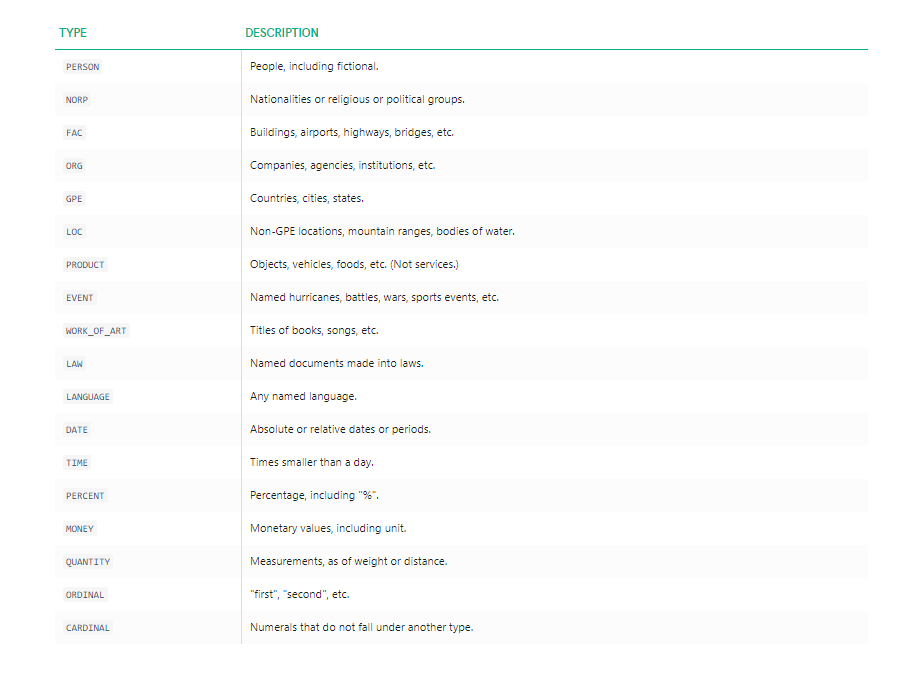

Vamos ver alguns exemplos do reconhecedor de entidades nomeadas do spaCy:

In [46]:
import spacy
from spacy import displacy

# en_core_web_sm is a small English pipeline trained 
# on written web text (blogs, news, comments), 
# that includes vocabulary, syntax and entities.
nlp = spacy.load('en_core_web_sm')

Carregado o modelo, podemos fazer a análise de um documento. O exemplo usa a frase do discurso do John Kennedy.

In [47]:
sent = nlp(text)

Para mostrar as entidades nomeadas reconhecidas nesse texto, podemos usar o `displacy`, como no exemplo a seguir. Observe que ele é capaz de encontrar um nome (o modelo erroneamente classifica "*Moon*" como pessoa - *Person*), e também "*this decade*" como uma data. 

In [48]:
displacy.render(sent, jupyter=True, style='ent')

Vamos testar o reconhecedor de entidades nomeadas no `spaCy` para encontrar entidades em uma notícia do *New York Times* sobre a desistência da *Boeing* em incorporar a Embraer.

In [49]:
text = """Walking away from the deal will help Boeing conserve cash at a time when it is facing a litany of 
          problems. The spread of the coronavirus forced the aerospace giant to temporarily close factories, 
          although it has reopened some of them. And a steep drop in travel has prompted airlines around the 
          world to cancel orders. Boeing said it had decided to end two years of talks with Embraer, 
          a Brazilian plane maker, after a Friday night deadline passed without Embraer meeting certain 
          conditions, which Boeing would not specify."""

In [51]:
article = nlp(text)

O **spaCy** encontrou 9 entidades nesse trecho do artigo.

In [53]:
len(article.ents)

9

In [54]:
for ent in article.ents:
      print(ent.text, ent.label_)

Boeing ORG
Boeing ORG
two years DATE
Embraer PERSON
Brazilian NORP
Friday DATE
night TIME
Embraer GPE
Boeing ORG


In [55]:
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in article.ents]
print(ents)

[('Boeing', 37, 43, 'ORG'), ('Boeing', 353, 359, 'ORG'), ('two years', 387, 396, 'DATE'), ('Embraer', 411, 418, 'PERSON'), ('Brazilian', 433, 442, 'NORP'), ('Friday', 464, 470, 'DATE'), ('night', 471, 476, 'TIME'), ('Embraer', 501, 508, 'GPE'), ('Boeing', 554, 560, 'ORG')]


Finalmente, podemos usar o `displacy` para mostrar essas entidades:

In [56]:
displacy.render(article, jupyter=True, style='ent')

Observe que a entidade **`Embraer`** é reconhecida de diversas formas. Também há outros problemas que podem ser observados.

Você pode passar uma lista de tipos de entidade para restringir a visualização:

In [59]:
options = {'ents': ['ORG', 'NORP']}

displacy.render(article, jupyter=True, style='ent', options=options)

Você também pode passar opções de cor de fundo e gradiente:

In [61]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cde, #dc9ce7)', 'NORP': 'radial-gradient(white, red)'}
options = {'ents': ['ORG', 'NORP'], 'colors':colors}

displacy.render(article, jupyter=True, style='ent', options=options)

**Mais exemplos**

In [63]:
doc = nlp("I live in New York")
for word in doc.ents:
    print(word.text, word.label_) 

New York GPE


`New York` is **GPE** — Geo-Political Entity

Se você está se perguntando qual poderia ser o significado do rótulo retornado, podemos usar o código abaixo:

In [65]:
spacy.explain('GPE'), spacy.explain('ORG'), spacy.explain('MONEY') 

('Countries, cities, states',
 'Companies, agencies, institutions, etc.',
 'Monetary values, including unit')

In [67]:
doc = nlp("Bill Gates and Paul Allen founded Microsoft")
displacy.render(doc, jupyter=True, style="ent")

**Adicionando uma nova entidade**

In [83]:
doc = nlp('Dogecoin is a parody cryptocurrency created by software engineer Billy Markus and Jackson Palmer in 2013.')
for word in doc.ents:
    print(word.text, word.label_) 

Billy Markus PERSON
Jackson Palmer PERSON
2013 DATE


In [84]:
from spacy.tokens import Span

new_ent = Span(doc, 0, 1, label = "MONEY")
doc.set_ents([new_ent], default = 'unmodified')

for word in doc.ents:
    print(word.text, word.label_)

Dogecoin MONEY
Billy Markus PERSON
Jackson Palmer PERSON
2013 DATE


In [85]:
displacy.render(doc, jupyter=True, style="ent")

**Referência**:

Este notebook foi criado pelo prof. **Ronaldo Prati** [UFABC] e foi adaptado por mim.